# Group contribution statement

We worked on this project much like a discussion worksheet, in which we all collaborated and contributed equally and at the same time. We set times to meet throughout the week to work on this assignment. We were able to repurpose most of our code from old discussion worksheets and HW 7. When it came to adding expository text, Claire worked on SVM, Emma worked on Logistic Regression, and Zoeb worked on Decision Trees. 

### Important Recurring Terms
- Machine learning: this is a process through which we *train* a model by allowing it to figure out mathematical connections between attributes of a dataset and hopefully teach it to correctly predict something. In this case, we want our model to be able to predict the species of a penguin based on some characteristics, like the length and depth of its Culmen. 
- Preprocessing: cleaning up the original dataset to help our model accurately make predictions
- Train/test split: Here, we are splitting the original dataset into a training and testing split. We will *train* the model using 80% of the data and then check to see how accurate it is by comparing predictions it makes on the *test* set to the actual species of penguins in the *test* set. 
- Predictor Variables: These are columns of the dataset we will be using to make our predictions. Things like `Culmen Length (mm)`, `Culmen Depth (mm)`, and other penguin characteristics are predictor variables
- Target Variables: This is an aspect of the penguins that we want the machine learning model to predict. Aspects like `Species` or `Sex` could be viable target variables
- Optimal Model Complexity: All machine learning models have an attribute called 'model complexity.' Essentially, if you have a more complex model, it will be able to make more connections in the data it is trained on. However, this may not translate directly to better performance in the test set...

### Importing Modules and dataset
The dataset we are using is palmer penguins. This dataset includes several measurements taken for 344 penguins in Antarctica. 

In [1]:
# importing modules
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
import numpy as np

In [2]:
# loading the data
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

In [3]:
# shorten the species name for simplicity
penguins["Species"] = penguins["Species"].str.split().str.get(0)

In [4]:
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


# Exploratory analysis
In this dataset, we can clearly see that we have a bunch of columns that give us various pieces of information about the penguins. Before doing any Machine Learning, lets see if we can learn anything about the penguins by exploring the data.

### Summary tables
This is a great way we can get a good idea of what all the data tells us. It is a bit hard to look at all 343 rows and 17 columns and learn anything of value. Summary tables do exactly what they imply; the help us *summarize* the data. While we could simple use standard `numpy` functions on columns of the dataset, like `np.mean`, `np.std`, etc (this is called simple aggregation) We can do something a lot more useful. We can use the **Split-Apply-Combine** technique to summarize the data by **groups** that we define. For example, rather than getting the mean `Flipper Length (mm)` for all the penguins in the data, we can get the mean `Flipper Length (mm)` for each `Species` of penguin we have. This method works in three stages, just like the name suggests:
1. **Split** the data into groups
2. **Apply** an aggregation function to each new piece of the data, which yields a single number 
3. **Combine** the results into a new DataFrame

We can do this using the groupby() method



In [5]:
penguins.groupby(["Species", "Island"])["Culmen Length (mm)", 
                                        "Culmen Depth (mm)", 
                                        "Flipper Length (mm)", 
                                        "Delta 15 N (o/oo)"].aggregate([np.mean, np.std]).round(2)

<ipython-input-5-352ad8c409f0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  penguins.groupby(["Species", "Island"])["Culmen Length (mm)",


Culmen Length (mm)       Culmen Depth (mm)        \
                                  mean   std              mean   std   
Species   Island                                                       
Adelie    Biscoe                 38.98  2.48             18.37  1.19   
          Dream                  38.50  2.47             18.25  1.13   
          Torgersen              38.95  3.03             18.43  1.34   
Chinstrap Dream                  48.83  3.34             18.42  1.14   
Gentoo    Biscoe                 47.50  3.08             14.98  0.98   

                    Flipper Length (mm)       Delta 15 N (o/oo)        
                                   mean   std              mean   std  
Species   Island                                                       
Adelie    Biscoe                 188.80  6.73              8.82  0.38  
          Dream                  189.73  6.59              8.95  0.42  
          Torgersen              191.20  6.23              8.79  0.46  
Chinstrap Dream                  195.82  7.13              9.36  0.37  
Gentoo    Biscoe                 217.19  6.48              8.25  0.26

In this summary table, we can clearly see the mean and standard deviation in`Culmen Length (mm)`, `Culmen Depth (mm)`, `Flipper Length (mm)`, and `Delta 15 N (o/oo)` grouped by the `Species` of penguins on each `Island`. From this, we also notice that while Adelie penguins are found on all 3 islands, Chinstrap and Gentoo penguins are found only on Dream and Biscoe Island respectively. 

### Visualizations

Another great way to learn from the dataset is to make some informative graphs. Based on our summary table, we know that the mean culmen lengths and depths vary by species. Let’s make a scatter plot of all the penguins and color code it by species. 

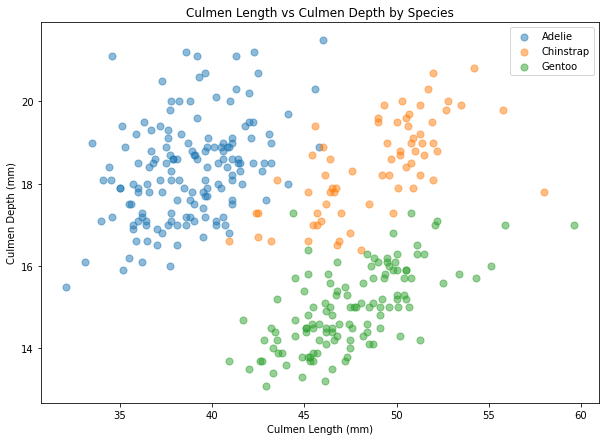

In [6]:
fig, ax = plt.subplots(1, figsize = (10, 7))
ax.set(title = "Culmen Length vs Culmen Depth by Species",
       xlabel = "Culmen Length (mm)",
       ylabel = "Culmen Depth (mm)")

species = np.unique(penguins["Species"])
for x in species: # looping through list of species to plot each penguin by species
    newpenguins = penguins[penguins["Species"] == x]
    ax.scatter(newpenguins["Culmen Length (mm)"], newpenguins["Culmen Depth (mm)"], s = 50, label = x.split()[0], alpha = 0.5)
    
ax.legend()

Interesting! It looks like there are definitely some clusters for species in terms of culmen length and depth. There are a lot more characteristics of the penguins in the dataset. Let's see if we can find clusters with other features...


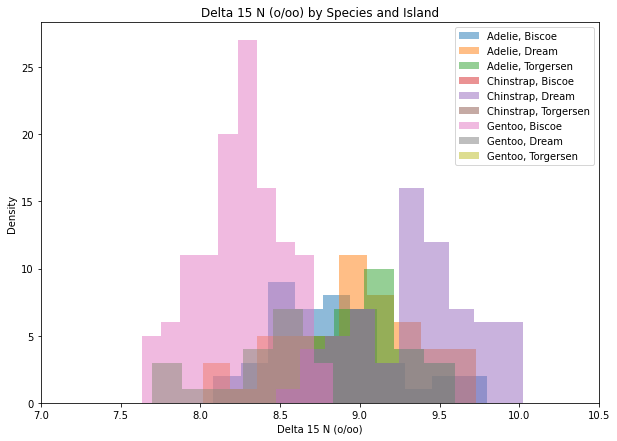

In [7]:
fig, ax = plt.subplots(1, figsize = (10, 7))
ax.set(title = "Delta 15 N (o/oo) by Species and Island",
       xlabel = "Delta 15 N (o/oo)",
       ylabel = "Density")
species = np.unique(penguins["Species"])
location = np.unique(penguins["Island"])
for x in species:
    for y in location: # nested for loop ensures we get penguins separated by species AND island
        newpenguins = penguins[(penguins["Species"] == x) 
                             & (penguins["Delta 15 N (o/oo)"].notnull()) 
                             & (penguins["Island"] == y)]
        ax.hist(newpenguins["Delta 15 N (o/oo)"], label = x + ", " + y, alpha = 0.5)
plt.xlim([7, 10.5])
ax.legend()

This histogram shows us the $\Delta$ N ‰ grouped by species and island. We can see that there is a lot of overlap for these values in many of the penguins, but Gentoo penguins on Biscoe and Chinstrap penguins on Dream have some significant differences.

We've seen how the penguins differ by species and Island. What about Sex?

[Text(0.5, 1.0, 'Flipper Length by species and sex')]

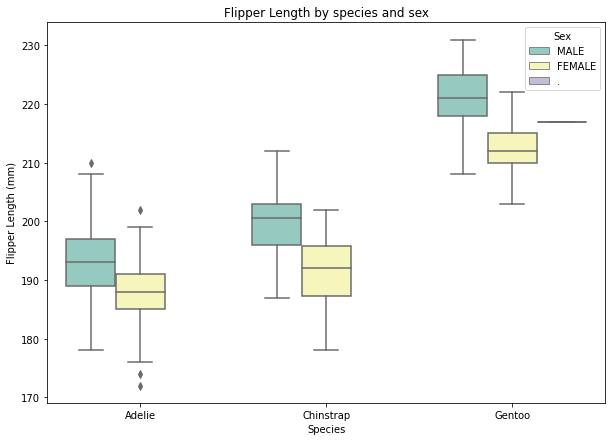

In [8]:
import seaborn as sns
fig, ax = plt.subplots(1, figsize = (10, 7))
ax = sns.boxplot(x="Species", y="Flipper Length (mm)", hue = "Sex", data=penguins, palette = "Set3")
ax.set(title = "Flipper Length by species and sex")

Hmm, this graph looks okay at first but interestingly, we can also see a third category for Sex that is encoded by `.` Let's remove this and look at the plot again 

In [9]:
penguins = penguins[penguins['Sex'] != '.'] # dropping penguins whose sex is encoded as '.'

[Text(0.5, 1.0, 'Flipper Length by species and sex')]

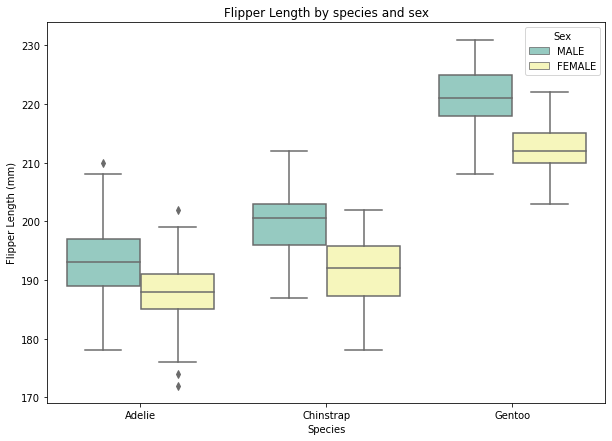

In [10]:
import seaborn as sns
fig, ax = plt.subplots(1, figsize = (10, 7))
ax = sns.boxplot(x="Species", y="Flipper Length (mm)", hue = "Sex", data=penguins, palette = "Set3")
ax.set(title = "Flipper Length by species and sex")

This looks much better! From this boxplot, we can see how the Flipper length of penguins changes between males and females, as well as the species. We can clearly see that the male penguins have higher values than females across all species, but we can also notice that Gentoo penguins have the largest flipper lengths, followed by Chinstrap and Adelie penguins. 

### How will these findings help us with Machine Learning?
This exploratory analysis has helped us find features that have significant differences across species of penguins -- notably the `Culmen Length (mm)`, `Culmen Depth (mm)`, `Flipper Length (mm)`, and `Delta 15 N (o/oo)`. While we will still check all the combinations of variables to see which produce the most accurate model, knowing that these features are relevant can help us intuitively check if our models are working as they should. In addition to this, the summary table and visualizations will definitely help us see where and why our models predict some penguins incorrectly. 

# Modeling

Now that we’ve spent some time learning about the Palmer penguins, and have noticed some significant trends in characteristics, lets see if we can train some Machine Learning models to predict the species of a penguin based on their traits. Remember Machine Learning is a process through which we *train* a model by allowing it to figure out mathematical connections between attributes of a dataset and teach it to predict something. We want our models to be able to accurately predict the species of a penguin based on their features. 

### Preprocessing
In this portion of the project, we will be preprocessing the `penguins` dataset to make it more suitable for Machine Learning. The first thing to do is to split the dataset into a training and testing split. This allows us to *train* the model on one subset of the data, and later *test* how good the model is at classifying by comparing its predictions to some unseen data.

In [11]:
from sklearn.model_selection import train_test_split

np.random.seed(1000) # setting seed so we get the same values when we run the code again

train, test = train_test_split(penguins, test_size = 0.2) # 20% of the dataset will be held as a test set

After this, we have lots of preprocessing to do. Most importantly, we need to separate the **predictor variables** (characteristics of the penguin) from the **target variables** (Species of the penguin). Since we need to do this for the training and the testing split, we can write a function to do so. Since we are preprocessing, we might as well remove some irrelevant columns that won't matter to our model, like `studyName` , `Comments` , etc. We can also remove the rows in which there are `NaN` values for the predictor variables we may use. In addition to this, we need to convert some text information to numerical data so that our model can understand it. Attributes like `Sex` , `Region` , etc can only have a few different values, so using a `LabelEncoder` can help us convert this to a numerical value.

In [12]:
def clean_data(df_data):
    """
    A function to clean the DataFrame and split the train and test splits further into predictor and target variables
    
    Parameters
    ----------
    df_data: The df to be cleaned
    
    Returns
    -------
    X: the cleaned predictor variables
    y: the cleaned target variable
    """
    df = df_data.copy()
    df = df.drop(['studyName', 'Sample Number', 'Stage', 'Individual ID', 'Comments', 'Date Egg', 'Clutch Completion'], axis = 1)
    df = df.dropna() # dropping NaN rows for columns of interest
    df = df[df['Sex'] != '.'] # dropping penguins whose sex is encoded as '.'
    le = preprocessing.LabelEncoder()
    for col in ['Sex', 'Species', 'Island', 'Region']: # using a label encoder to simplify text data
        df[col] = le.fit_transform(df[col])

    X = df.drop(['Species'], axis = 1) # now, X only has predictor variables 
    y = df['Species'] # y is a column of species
    
    return X, y

In [13]:
X_train, y_train = clean_data(train)
X_test, y_test = clean_data(test)

In [14]:
# checking to make sure our cleaning worked properly
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(255, 9) (255,)
(69, 9) (69,)


## Decision Tree
Decision tree learning is a type of modeling approach that identifies patterns in the data and makes a prediction based on them. It is kind of like a yes or no flowchart that can be used to predict a value for any row in the data. For example, lets say you had a dataset that included the current time zone of every student in PIC 16A and whether or not they were attending live lectures or taking this class asynchronously. The model may notice that a large number of students in countries more than 10 hours ahead tended to watch the lectures asynchronously. So, if you were to use this decision tree model to predict if a particular student was watching live lectures. The first thing it might check is the student’s time zone. If it is only 6 hours ahead of LA, it may predict that the student is indeed watching live lectures. Conversely, if the student was in a country 13 hours ahead of LA, the model may think they are watching the recorded versions. You can specify how many decisions/branches you want the tree to have by using the `max_depth` parameter. More branches means the model will get better and better at making predictions on the **train data**. Don’t forget about overfitting though... Before we can get to determining optimal model complexity, lets first determine what *features* of the penguins dataset give us the best results. In this dataset, we have seen that the penguins differ significanlty in some of the features measured, like `Culmen Length (mm)`, `Island`, etc. A Decision Tree would work well here, since the model will be able to identify these features and make classifications based on them

### Feature Selection

We already saw some of the most important features in our summary tables and visualizations, but lets make the process more robust. To choose which 3 columns may give us the most accurate model, we decided to test all the possible combinations that could be made from the 9 possible **predictor variables**. In order to do so, we used `itertools.combinations` and `cross_val_score` to see which combinations gave us the highest accuracy. 

In [15]:
feature_array = np.array(X_train.columns) # making an array of the column names in X_train

In [16]:
import itertools
combos = itertools.combinations(feature_array, 3) # creating an array of combinations of length 3

In [17]:
combosof3 = []
for i in combos:
    i = list(i) # converting the combination to a list
    combosof3.append(i)

Now, we need to actually see which combination is the best in terms of accurately predicting the species of the penguin. For this, we used `cross_val_score` . K-fold cross validation takes a small piece of the training data (say 10%) and hides it from the model, akin to a mini test set. We train the model on the remaining 90% and then evaluate its performance based on the 10% that we hid. We can then hide a *different* 10% of the data and do the same thing. We can repeat this many times to eventually get an average picture of how our model may perform on the real test data. This is very useful when evaluating optimal complexity of a model, but can also be used for feature selection. To do this, we initialized a `best_score` and `best_combo` value and list to `0`and `empty` respectively. We then looped through all the viable combinations we generated from the previous code cell and trained a model with these columns using cross validation. We then checked to see if the `cv_score` was better than the `best_score` . If it was, update the current `best_score` with the new `cv_score` , and update the `best_combo` list with the current combination. 

Since we didn’t know if different models would have different optimal features, we ran feature selection for each one. For Decision trees, we initialized a `DecisionTreeClassifier` object with a `max_depth` of 5 (we figured this would be a good middle point — not too complex yet not too simple)

In [18]:
from sklearn import tree
from sklearn.model_selection import cross_val_score 

def check_column_score(model, combosof3): 
    """
    Trains and evaluates a model via cross-validation on the different combinations of columns of the data
    
    Parameters
    ----------
    model: The model for which columns are to be tested. This helps us write DRY code
    combosof3: A list of potential combinations that can be used to train a model
    
    Returns
    -------
    best_combo: the best combination of columns in terms of accuracy
    best_score: the highest score acheived by a model with the best combination
    """
    # print("training with columns " + str(cols)
    best_score = 0
    best_combo = []
  
    for cols in combosof3:
        cv_score = cross_val_score(model, X_train[cols], y_train, cv = 5).mean()
        if cv_score > best_score:
            best_score = cv_score
            best_combo = cols
    
    return best_combo, best_score

In [19]:
T = tree.DecisionTreeClassifier(max_depth = 5) # initializing our decision tree model
best_combo, best_score = check_column_score(T, combosof3)

In [20]:
print(best_combo, best_score) # we found the best combination had an accuracy of 98%

['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'] 0.9803921568627452


Interesting! It looks like the best columns for the Decision Tree are `Island`, `Culmen Length (mm)`, and `Culmen Depth (mm)` and this gave us a cv score of 98%!!

In [21]:
# updating XT_train and XT_test to only have the 'best' columns
XT_train = X_train[best_combo]
XT_test = X_test[best_combo]

We created different train and test sets based on the columns that the `check_column_score` function yields for each model.

### Choosing Optimal Model Complexity

We previously mentioned how a Decision Tree can be made more or less complex by altering the `max_depth` parameter. Remember that a higher `max_depth` will yield a more complex model. While this may sound good, it could lead to overfitting. This is a phenomenon that occurs when our model complexity is so high that it perfectly (or almost perfectly) classifies the training data (that it has seen), but performs worse on the test data (that it has not seen). In order to choose the optimal model complexity, we will again use K-fold cross validation. Here however, instead of modifying the columns, we will modify the `max_depth` value. In order to show this information clearly, we can plot the change in CV score due to the increasing model complexity.


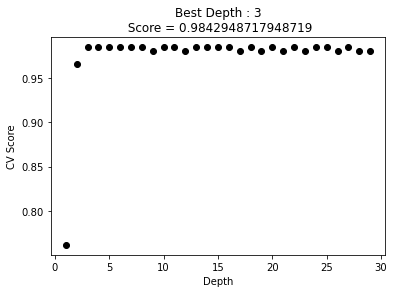

In [22]:
fig, ax = plt.subplots(1)

best_score = 0
best_depth = 0

for d in range(1, 30): # try max_depth values from 1 to 30
    T = tree.DecisionTreeClassifier(max_depth = d)
    cv_score = cross_val_score(T, XT_train, y_train, cv = 20).mean()
    ax.scatter(d, cv_score, color = 'black') # plot the max_depth value and the cv_score

    if cv_score > best_score:
        best_depth = d
        best_score = cv_score

l = ax.set(title = "Best Depth : " + str(best_depth) + "\n Score = " + str(best_score),
           xlabel = "Depth",
           ylabel = "CV Score",
           alpha = 0.5)

We can see that the best depth for our decision tree model based on the features we selected previously is 3. The model with this `max_depth` had a mean cv score of 98.4%! Remember that decision trees work by picking features and then making a sort of “yes or no” question based on that feature. If you allow the model to ask more questions, it might be able to predict penguins better. This is why we can see a clear increase in cv score as the `max_depth` increases from 1 to 3. While we may think that the cv score should decrease as we increase the `max_depth`, this particular dataset contains rather simple columns, and the penguins are easily classified. However, in general, higher `max_depth` will most probably lead to overfitting and therefore decrease the cv score. Now that we have our optimal model complexity, lets see how it performs when trained on *all* the train data, and scored against *all* the test data. 

In [23]:
# your code here
T = tree.DecisionTreeClassifier(max_depth = best_depth)
T.fit(XT_train, y_train)
print(best_score)
print(T.score(XT_test, y_test))

0.9842948717948719
0.9855072463768116


Amazing! We got an accuracy of 98.5% when the model was scored on all the test data. Another interesting thing we can do with decision trees is actually plot them to see how it makes predictions. Let’s do this for our model

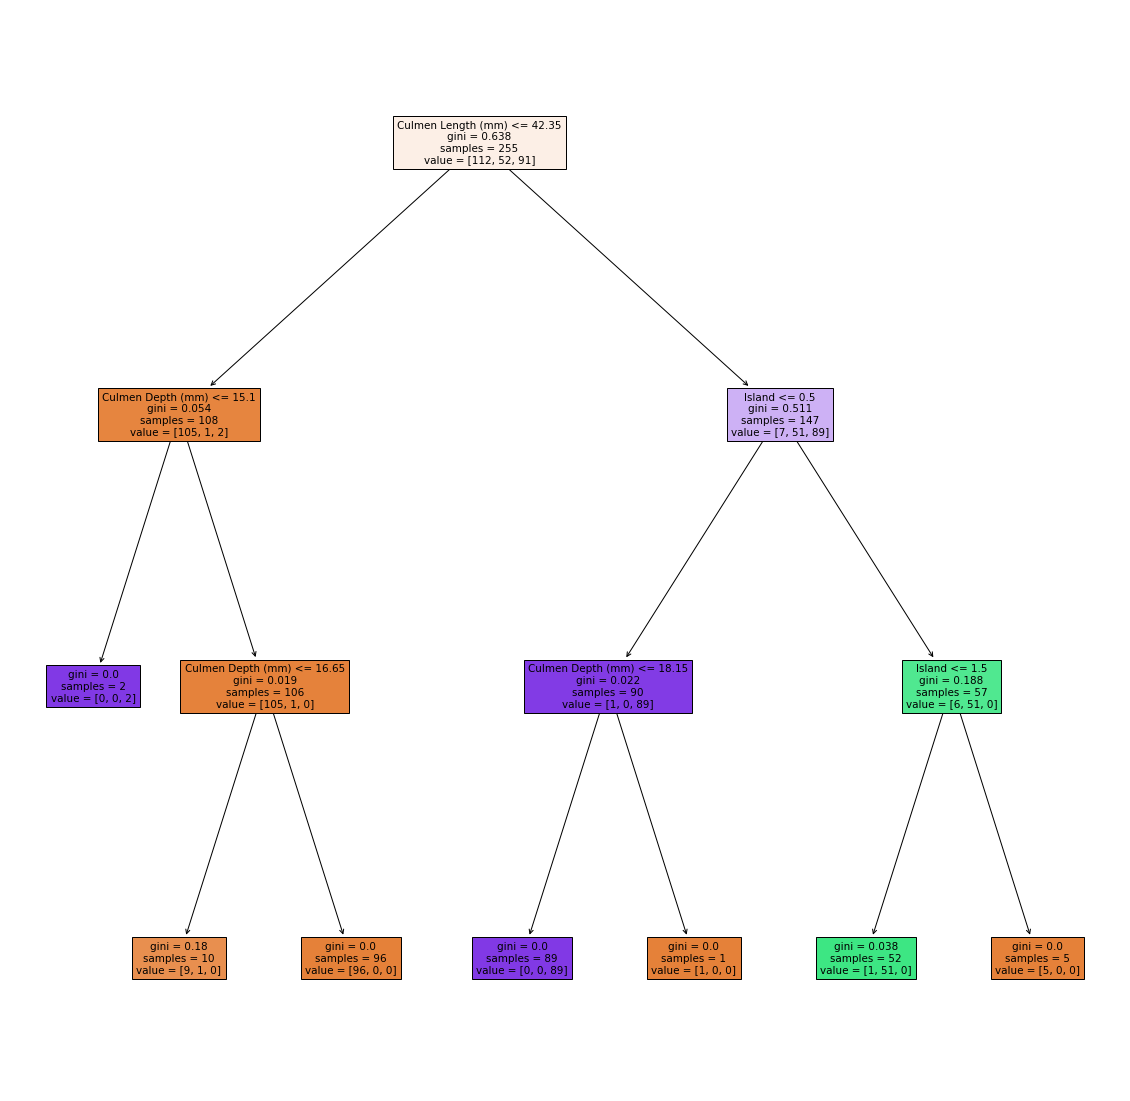

In [24]:
fig, ax = plt.subplots(1, figsize = (20, 20))
p = tree.plot_tree(T, filled = True, feature_names = best_combo)

Interesting! We can see that the model first checks to see if `Culmen Length (mm)` is less than or equal to 42.5. If it is, it checks `Culmen Depth (mm)` in a similar manner. Hang on, how can `Island` be less than or equal to 0.5? Remember we used a `LabelEncoder` to convert the Island name to a numerical value. In this case:

- “Biscoe” was converted to 0
- “Dream” was converted to 1
- “Torgerson” was converted to 2

### Confusion Matrix - Decision Tree
Although our model is pretty good, it still messes up on occasion. Lets try to figure out why this is happening. In order to do this, we can create a confusion matrix, which basically shows us where our model is incorrectly classifying penguins.

In [25]:
# get the model's predictions based on the test data
y_test_pred = T.predict(XT_test)
y_test_pred

array([2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 2,
       2, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2,
       2, 1, 2])

In [26]:
# create a confusion matrix of the actual test target variables and our model's predictions
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test, y_test_pred)
c

array([[26,  1,  0],
       [ 0, 15,  0],
       [ 0,  0, 27]])

In a confusion matrix, the i,jth entry shows us the number of times the model predicted j when the value was actually i. For example, the very first number in the matrix is 26. This means that the model predicted the species to be 0 (remember we used a LabelEncoder to change names to numbers) and the actual species was also 0 26 times. Similarly, the model predicted the species to be 0 when the actual species was 1 on 1 occasion. We can use Boolean indexing to extract all the incorrectly classified penguins.

In [27]:
mistakes = XT_test[y_test != y_test_pred] # getting the rows of X_test for which our model messed up
mistake_labels = y_test[y_test != y_test_pred] # getting the actual species for where the model messed up 
mistake_preds = y_test_pred[y_test != y_test_pred] # getting the (incorrect) predicted species

mistake_preds, mistake_labels

(array([1]),
 43    0
 Name: Species, dtype: int64)

We can see that our model incorrectly classified penguin 43 as Chinstrap, when it was actually an Adelie. Let's see if we can figure out why this is by comparing it with the summarized stats from earlier.

In [28]:
penguins[['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']].loc[43]

Species               Adelie
Island                 Dream
Culmen Length (mm)      44.1
Culmen Depth (mm)       19.7
Name: 43, dtype: object

From our summary table, we saw that the mean `Culmen Length (mm)` and `Culmen Depth (mm)` of Adelie penguins was around 38 and 18 respectively. However, we can see that penguin 43 has much larger values for both of these measurements, and in fact is closer to the mean of Chinstrap penguins. Therefore, the model incorrectly classified it. 

## Logistic Regression
Logistic Regression is a very popular type of model. It is mainly used to estimate probabilities. In logistic regression, a set of independent variables are used to predict the categorical dependent variable based on a logistic function. Multinomial logistic regression is a generalized version of logistic regression; logistic regression predicts the probability of two discrete categorical outcomes whereas multinomial logistic regression can predict the probabilities of more than two possible outcomes of the dependent variable. The multinomial logistic regression model is a good choice for our modeling task as we are seeking to predict the Species of penguins (which is a categorical variable with more than two categories), based on other variables from our dataset.

### Feature Selection
See above for explanation

In [29]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter = 1000)
best_combo, best_score = check_column_score(LR, combosof3)

In [30]:
print(best_combo, best_score) # we found the best combination had an accuracy of 99%

['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)'] 0.9921568627450981


In [31]:
# creating XLR_train and XLR_test to only have the 'best' columns for this model
XLR_train = X_train[best_combo]
XLR_test = X_test[best_combo]

### Evaluating Logistic Regression

In [32]:
LR.fit(XLR_train, y_train) # fitting the model on all of our training data
print('Score = ' + str(LR.score(XLR_test, y_test))) # evaluating the model on the test data

Score = 0.9710144927536232


### Confusion Matrix - Logistic Regression
See above for explanation

In [33]:
y_test_pred = LR.predict(XLR_test)
y_test_pred

array([2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2,
       2, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2,
       2, 1, 2])

In [34]:
c = confusion_matrix(y_test, y_test_pred)
c

array([[26,  1,  0],
       [ 1, 14,  0],
       [ 0,  0, 27]])

In [35]:
mistakes = XLR_test[y_test != y_test_pred] # getting the rows of X_test for which our model messed up
mistake_labels = y_test[y_test != y_test_pred] # getting the actual species for where the model messed up 
mistake_preds = y_test_pred[y_test != y_test_pred] # getting the (incorrect) predicted species

mistake_preds, mistake_labels

(array([1, 0]),
 73     0
 216    1
 Name: Species, dtype: int64)

In Logistic Regression, we can see that it incorrectly classified penguins 73 and 216. 
- Model thinks penguin 73 is Chinstrap. It is actually Adelie
- Model thinks penguin 216 is Adelie. It is actually Chinstrap

Let's look at the data to see why.

In [36]:
penguins[['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']].loc[73]

Species                   Adelie
Island                 Torgersen
Culmen Length (mm)          45.8
Culmen Depth (mm)           18.9
Flipper Length (mm)          197
Name: 73, dtype: object

We can see that penguin 73 also has an above average `Culmen Length (mm)` for Adelie penguins, and is actually closer to that of Chinstrap penguins. The `Flipper Length (mm)` for penguin 73 is also much closer to the mean for Chinstrap penguins than Adelie penguins

In [37]:
penguins[['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']].loc[216]

Species                Chinstrap
Island                     Dream
Culmen Length (mm)          43.5
Culmen Depth (mm)           18.1
Flipper Length (mm)          202
Name: 216, dtype: object

Penguin 216 has the opposite problem -- It's `Culmen Depth (mm)` and `Culmen Length (mm)` are both lower than the averages for Chinstrap penguins and are closer to the Adelie penguins. 

## SVM
Using SVM allows us to have "curvier" decision regions that may be better suited for the task of classifying penguins based on a few features. SVM works by creating "classes" from the dataset and determining the best boundaries to separate those classes when plotted. 

### Feature Selection
See above for explanation

In [38]:
from sklearn import svm
SVM = svm.SVC()
best_combo, best_score = check_column_score(SVM, combosof3)

In [39]:
print(best_combo, best_score) # we found the best combination had an accuracy of 92%

['Culmen Length (mm)', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)'] 0.9215686274509803


In [40]:
# creating XSVM_train and XSVM_test to only have the 'best' columns for this model
XSVM_train = X_train[best_combo]
XSVM_test = X_test[best_combo]

### Optimal model complexity 
See above for explanation

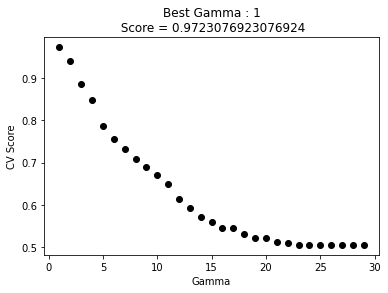

In [41]:
fig, ax = plt.subplots(1)

best_score = 0
best_gamma = 0

for d in range(1, 30): # try gamma values from 1 to 30
    SVM = svm.SVC(gamma = d)
    cv_score = cross_val_score(SVM, XSVM_train, y_train, cv = 10).mean()
    ax.scatter(d, cv_score, color = 'black') # plot the gamma value and the cv_score

    if cv_score > best_score:
        best_gamma = d
        best_score = cv_score

l = ax.set(title = "Best Gamma : " + str(best_gamma) + "\n Score = " + str(best_score),
           xlabel = "Gamma",
           ylabel = "CV Score",
           alpha = 0.5)

From this graph, we can clearly see that the CV score decreases consistently as we increase the `gamma` value. Remember that K-Fold Cross Validation involves splitting the training data further into training and testing sets and computing the accuracy based on the model's predictions on hidden data. From the graph, we can see that as we make the model more complex, it will perform worse on data it has not seen yet. We can clearly see that the best value for gamma is actually 1 (accuracy of 0.972). However, lets investigate further and see if there is another gamma value that may yield a higher score

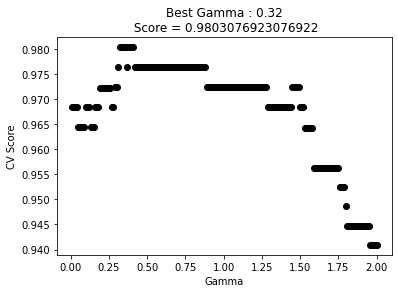

In [42]:
fig, ax = plt.subplots(1)

best_score = 0
best_gamma = 0

for d in np.linspace(0.01, 2, 200): # this time, we are checking 200 possible values between 0.01 and 2.0
    SVM = svm.SVC(gamma = d)
    cv_score = cross_val_score(SVM, XSVM_train, y_train, cv = 10).mean()
    ax.scatter(d, cv_score, color = 'black')

    if cv_score > best_score:
        best_gamma = d
        best_score = cv_score

l = ax.set(title = "Best Gamma : " + str(best_gamma) + "\n Score = " + str(best_score),
           xlabel = "Gamma",
           ylabel = "CV Score",
           alpha = 0.5)

This time, we looked at potential gamma values between 0.01 and 2.0 and found that we could get an even higher score of 0.98 when we used gamma = 0.32. Now that we have the optimal model complexity, lets see how it performs on the actual test data.

In [43]:
print('Best Gamma = ' + str(best_gamma))
SVM = svm.SVC(gamma = best_gamma) # Creating an SVM model with gamma = best_gamma
SVM.fit(XSVM_train, y_train) # fitting the model on all of our training data
print('Score = ' + str(SVM.score(XSVM_test, y_test))) # evaluating the model on the test data

Best Gamma = 0.32
Score = 0.9565217391304348


Not bad! We got an accuracy of around 95.6% when we fitted the model on all of the training data and evaluated it with the all of the testing data. However, there are still many things we can do!


### Confusion matrix - SVM
See above for explanation

In [44]:
# get the model's predictions based on the test data
y_test_pred = SVM.predict(XSVM_test)
y_test_pred

array([2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 2, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2,
       2, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2,
       2, 1, 2])

In [45]:
# create a confusion matrix of the actual test target variables and our model's predictions
c = confusion_matrix(y_test, y_test_pred)
c

array([[26,  1,  0],
       [ 1, 14,  0],
       [ 0,  1, 26]])

In [46]:
mistakes = XSVM_test[y_test != y_test_pred] # getting the rows of X_test for which our model messed up
mistake_labels = y_test[y_test != y_test_pred] # getting the actual species for where the model messed up 
mistake_preds = y_test_pred[y_test != y_test_pred] # getting the (incorrect) predicted species

mistake_preds, mistake_labels

(array([1, 1, 0]),
 253    2
 73     0
 216    1
 Name: Species, dtype: int64)

We can see that the SVM model incorrectly classified penguins 253, 73, and 216 
- The model thought penguin 253 was Chinstrap. It was actually Gentoo
- The model thought penguin 73 was Chinstrap. It was actually Adelie
- The model thought penguin 216 was Adelie, It was actually Chinstrap

Let's look at each penguin and see if we can figure out why the model was wrong

In [47]:
penguins[['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)']].loc[253]

Species                Gentoo
Island                 Biscoe
Culmen Length (mm)       59.6
Culmen Depth (mm)          17
Delta 15 N (o/oo)     7.76843
Name: 253, dtype: object

We can see that penguin 253's `Culmen Depth (mm)` is much closer to the average for Chinstrap penguins compared to Gentoo penguins. Also, the `Culmen Length (mm)` was a little closer as well

In [48]:
penguins[['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)']].loc[73]

Species                  Adelie
Island                Torgersen
Culmen Length (mm)         45.8
Culmen Depth (mm)          18.9
Delta 15 N (o/oo)       8.18658
Name: 73, dtype: object

Penguin 73's Culmen Length is also much closer to the average Culmen Length of Chinstrap penguins than they are the to the averages for Adelie penguins, so the model incorrectly classfied them.

In [49]:
penguins[['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)']].loc[216]

Species               Chinstrap
Island                    Dream
Culmen Length (mm)         43.5
Culmen Depth (mm)          18.1
Delta 15 N (o/oo)       9.37608
Name: 216, dtype: object

Penguin 216's Culmen Length and Depth are closer to the average Culmen Length and Depth of Adelie Penguins on Dream Island so the model incorrectly classifed it

---
# Discussion of Results
In our investigation, we learned many things about the Palmer penguins as well as our models that we made to predict their species. Here is a summation of all our important results:

| Model Name | Features Used | Complexity | Accuracy | Index of Incorrectly Classified Penguins | 
| :--------: | :-----------: | :--------: | :------: | :--------------------------------------: |
| Decision Tree | Island, Culmen Length (mm), Culmen Depth (mm) | max_depth = 3 | 98.55 | 43 | 
| Logistic Regression | Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm) | - | 97.1 | 73, 216 | 
| SVM | Culmen Length (mm), Culmen Depth (mm), Delta 15 N (o/oo) | gamma = 0.32 | 95.6 | 253, 73, 216 | 

Our best model was the Decision Tree with an accuracy of 98.55% on unseen test data

From the table, we can clearly see that penguins 73 and 216 pose significant problems, since they were classified incorrectly in **two** models. Remember that both of these penguins have average Culmen Lengths and Depths that are closer to the averages for another species. Furthermore, their Flipper length and Delta 15 N (o/oo) are closer to the averages for a different species. 

Based on this investigation, our group recommends using a Decision Tree to classify penguins for the following reasons:
- Highest accuracy of all the models evaluated
- Using a higher `max_depth` (i.e. increasing the complexity) does not reduce model performance -- this can be useful if you want to test more features/increase max_depth
- It took the least amount of time to run

Rather than analyzing the summary tables and dataset to choose our features, we used a slightly different method of feature engineering, which allowed us to test all possible column choices before settling on the best one. Furthermore, we identified the best columns **for each model** rather than using feature engineering just once. All of our models scored above 95%, so we definitely recommend using this approach over choosing features based on exploratory analysis. Given the fact that our Decision Tree had a 98.55% accuracy, we think that `Island`, `Culmen Length (mm)`, and `Culmen Depth (mm)` are the best features to use. Furthermore, in previous runs of our models (before we set the seed when we made the `train` and `test` splits, we found that our other models also chose these features and achieved similar accuracies. 

### How could our results be improved?
We think that **scaling** the data would lead to better results for the SVM and Logistic Regression models, since we did not include that step here. Due to this, the models may have placed more importance on the "wrong" columns, since measurements were not standardized. 

In addition to this, we think if there was more data and specifically more *variation* in the data, the model would be better at classifying the unique penguins that have irregular features. 

### Possible dangers?
Machine Learning is getting better and better and will most certainly have a huge impact in our lives moving forward. However, as a society, we cannot take machine learning results for granted and we most certainly need to eliminate as much bias as possible to ensure we don't harm people. While this particular project is quite low-stakes (we aren't going to use the results to do anything with the penguins), we need to recognize the importance of our results and what they mean moving forward. We can clearly see that our models were not good at classifying penguins that deviated from the average values of their species and that different combinations of features led to different accuracies (as indicated by our `best_combos` in feature selection). We can extrapolate these understandings to any machine learning project
- **Understand** that machine learning is rarely perfect unless given perfect data -- which may often be "flawed"
- **Recognize** that using different features may lead to better results

As Machine learning continues to progress and the world relies more heavily on data collected, we need to be conscious of the problems and limitations of this amazing technology to ensure that we are never violating any ethical boundaries.